# 1.3: Algorithm Properties

This section goes into detail about the criteria for assessing how good a solution algorithm is.




## Components of a Good Algorithm

An algorithm should have these following properties for it to be considered a good solution algorithm:

* **Accuracy:** how small is the expected error of this algorithm?
* **Efficiency:** how long does it take for the algorithm to run?
    * *rate of convergence:* how many iterations does it take to get a good result?
    * *operation count (FLOP count):* how many +,-,*,/ operations does the algorithm make?
* **Robustness:** how reliable is the algorithm? Can the algorithm fail? When will it fail?
    * *stability:* an algorithm is stabe if small changes to input data lead to only small changes to the solution
    * we hope that the problem statement is *well-conditioned*. This means that the problem statement is written in such a way that small changes to input data lead to only small changes in the solution
        * EXAMPLE OF A WELL-CONDITIONED PROBLEM: Suppose there is a function $g(x) = \tan(x)$. Approximate values around $g(x_0), x_0 \approx \frac{\pi}{2}$. If we set $x_0 = \frac{\pi}{2} - 0.001$, and set $\tilde{x_0} = \frac{pi}{2} - 0.002$ and plug both of these into $g(x)$, then $|x_0 - \tilde{x_0}| = 0.001$ BUT $|g(x_0)-g(\tilde{x_0})| = 500$. This means that a small change in the input results in a large change in the output.

## Error Accumulation & Stability

Roundoff errors will inevitably *accumulate linearly* during any sort of calculation. However, some algorithms will magnify roundoff errors such that the accumulation of roundoff error because larger/worse than linear. We want to try to avoid these scenarios. 

If $E_n$ is the relative error at $n^{th}$ operation (due to roundoff), then

* $E_n \approx C_0 n E_0$ is linear error accumulation
* $E_n \approx C_1 ^ n E_0$ is exponential error accumulation (REALLY BAD)


> #### Example 1: An Example of a Numerical Algorithm with BAD Stability
>
> Consider computing the following sequence:
> $$
    y_n = \int_0^1 \frac{x^n}{x+10}dx, n = 0,1,2,\cdots
  $$

We can see that (and can simplify as follows):
$$
  \begin{aligned}
    y_n + 10 y_{n-1} &= \int_0^1 \frac{x^n+10x^{n-1}}{x+10}dx\\
    &= \int_0^1 \frac{x^{n-1}(x+10)}{x+10}dx\\
    &= \int_0^1 x^{n-1}dx = \frac{x^n}{2}|_{x=0}^{x=1}
  \end{aligned}
$$

So we note that $y_n = \frac{1}{n} - 10y_{n-1}$. And if $n=0$, then we have that $y_0 = \ln(11) - \ln(10)$. 

The algorithm would be the following:

1. Iterate through values of $n$
2. Evaluate the recurrence relation


The code to run this algorithm is as follows:

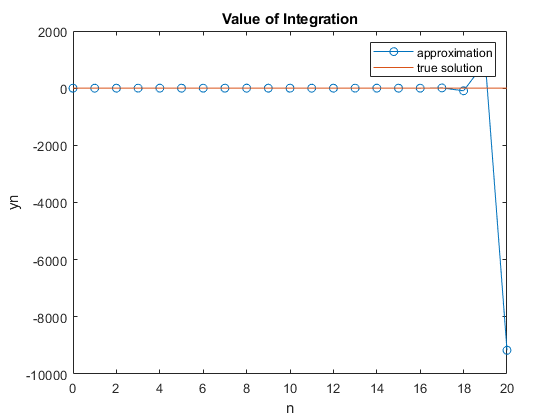

In [1]:
N = 20;
y = zeros(1, N+1);
ytrue = zeros(1, N+1);

ytrue(1) = log(11) - log(10);
y(1) = ytrue(1);

for n = 2:N+1
    f = @(x) x .^ n ./ (x+10);
    y(n) = 1/(n-1) - 10 * y(n-1);
    ytrue(n) = integral(f,0,1);
end

figure
plot(0:N, y, 'o-')
hold on
plot(0:N, ytrue)
hold off
xlabel('n')
ylabel('yn')
legend('approximation', 'true solution')
title('Value of Integration')

The above algorithm is **unstable** because on each step, we multiply the roundoff error in the previous step by 10. This means that we have exponential growth in our roundoff error. 